# Book Recommendation

### Business Objective:
Generate the features from the dataset and use them to recommend the books accordingly to the users.

### Data & Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Importing & Reading the Data Set

We have three data sets with us Books, users & Rating hence importing them

In [2]:
books = pd.read_csv('Books.csv')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')

In [3]:
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
users.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Books Data Set - Cleaning & Preprocessing

In [6]:
books.shape

(271360, 8)

In [7]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [8]:
# Dropping un-necessary columns

books.drop(['Image-URL-M','Image-URL-S'], axis = 1, inplace = True)
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [9]:
# Renaming the columns

Books = books.rename({"Book-Title":"Book Title","Book-Author":"Book Author","Year-Of-Publication":"YOP","Publisher":"Publisher","Image-URL-L":"ImageURL"}, axis=1)
Books.head(5)

,ISBN,Book Title,Book Author,YOP,Publisher,ImageURL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


#### Checking & filling up the null values

There are two places where null values are found,
- Book Author
- Publisher

Also in the 'YOP' column there is some jumbled values

##### Cleaning Book Author Column

In [10]:
Books.loc[Books['Book Author'].isnull(),:]

,ISBN,Book Title,Book Author,YOP,Publisher,ImageURL
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...


In [11]:
Books.at[187689 ,'Book Author'] = 'Other'

##### Cleaning publisher column

In [12]:
Books.loc[Books['Publisher'].isnull(),:]

,ISBN,Book Title,Book Author,YOP,Publisher,ImageURL
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...


In [13]:
Books.at[128890,'Publisher'] = 'other'
Books.at[129037,'Publisher'] = 'other'

In [14]:
Books.isnull().sum()

ISBN           0
Book Title     0
Book Author    0
YOP            0
Publisher      0
ImageURL       3
dtype: int64

There are no null values now

##### Cleaning year of publisher column

In [15]:
Books["YOP"].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [16]:
Books.loc[Books['YOP'] == 'DK Publishing Inc',:]

,ISBN,Book Title,Book Author,YOP,Publisher,ImageURL
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,NaN


In [17]:
Books.loc[Books['YOP'] == 'Gallimard',:]

,ISBN,Book Title,Book Author,YOP,Publisher,ImageURL
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,NaN


In [18]:
Books.at[209538 ,'Publisher'] = 'DK Publishing Inc'
Books.at[209538 ,'YOP'] = 2000
Books.at[209538 ,'Book Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
Books.at[209538 ,'Book Author'] = 'Michael Teitelbaum'

Books.at[221678 ,'Publisher'] = 'DK Publishing Inc'
Books.at[221678 ,'YOP'] = 2000
Books.at[209538 ,'Book Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
Books.at[209538 ,'Book Author'] = 'James Buckley'

Books.at[220731 ,'Publisher'] = 'Gallimard'
Books.at[220731 ,'YOP'] = '2003'
Books.at[209538 ,'Book Title'] = 'Peuple du ciel - Suivi de Les bergers '
Books.at[209538 ,'Book Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'

In [19]:
Books['YOP'] = Books['YOP'].astype(int)

In [20]:
Books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ISBN         271360 non-null  object
 1   Book Title   271360 non-null  object
 2   Book Author  271360 non-null  object
 3   YOP          271360 non-null  int32 
 4   Publisher    271360 non-null  object
 5   ImageURL     271357 non-null  object
dtypes: int32(1), object(5)
memory usage: 11.4+ MB


### Users Data Set - Cleaning & Preprocessing

In [21]:
users.shape

(278858, 3)

In [22]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [23]:
list_ = users.Location.str.split(', ')

city = []
state = []
country = []
count_no_state = 0    
count_no_country = 0

for i in range(0,len(list_)):
    if list_[i][0] == ' ' or list_[i][0] == '' or list_[i][0]=='n/a' or list_[i][0] == ',':  #removing invalid entries too
        city.append('other')
    else:
        city.append(list_[i][0].lower())

    if(len(list_[i])<2):
        state.append('other')
        country.append('other')
        count_no_state += 1
        count_no_country += 1
    else:
        if list_[i][1] == ' ' or list_[i][1] == '' or list_[i][1]=='n/a' or list_[i][1] == ',':   #removing invalid entries 
            state.append('other')
            count_no_state += 1            
        else:
            state.append(list_[i][1].lower())
        
        if(len(list_[i])<3):
            country.append('other')
            count_no_country += 1
        else:
            if list_[i][2] == ''or list_[i][1] == ',' or list_[i][2] == ' ' or list_[i][2] == 'n/a':
                country.append('other')
                count_no_country += 1
            else:
                country.append(list_[i][2].lower())
        
users = users.drop('Location',axis=1)

temp = []
for ent in city:
    c = ent.split('/')            #handling cases where city/state entries from city list as state is already given 
    temp.append(c[0])

df_city = pd.DataFrame(temp,columns=['City'])
df_state = pd.DataFrame(state,columns=['State'])
df_country = pd.DataFrame(country,columns=['Country'])

users = pd.concat([users, df_city], axis=1)
users = pd.concat([users, df_state], axis=1)
users = pd.concat([users, df_country], axis=1)

print(count_no_country)   #printing the number of countries didnt have any values 
print(count_no_state)     #printing the states which didnt have any values

4659
16044


In [24]:
users.isnull().sum()

User-ID         0
Age        110762
City            0
State           0
Country         0
dtype: int64

In [25]:
users["Age"].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [26]:
required = users[users['Age'] <= 80]
required = required[required['Age'] >= 10]

In [27]:
avg = round(required['Age'].mean())   
avg

35

In [28]:
users.loc[users['Age'] > 80, 'Age'] = avg    #outliers with age grater than 80 are substituted with mean 
users.loc[users['Age'] < 10, 'Age'] = avg    #outliers with age less than 10 years are substitued with mean
users['Age'] = users['Age'].fillna(avg)      #filling null values with mean
users['Age'] = users['Age'].astype(int)       #changing Datatype to int

In [29]:
users.isnull().sum()

User-ID    0
Age        0
City       0
State      0
Country    0
dtype: int64

In [30]:
Books.duplicated().sum()

0

In [31]:
ratings.duplicated().sum()

0

In [32]:
users.duplicated().sum()

0

### Ratings Data Set - Cleaning & Preprocessing

In [33]:
ratings.shape

(1149780, 3)

In [34]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

### Merging all three tables

In [35]:
dataset = pd.merge(Books, ratings, on='ISBN', how='inner')
dataset = pd.merge(dataset, users, on='User-ID', how='inner')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   ISBN         1031136 non-null  object
 1   Book Title   1031136 non-null  object
 2   Book Author  1031136 non-null  object
 3   YOP          1031136 non-null  int32 
 4   Publisher    1031136 non-null  object
 5   ImageURL     1031132 non-null  object
 6   User-ID      1031136 non-null  int64 
 7   Book-Rating  1031136 non-null  int64 
 8   Age          1031136 non-null  int32 
 9   City         1031136 non-null  object
 10  State        1031136 non-null  object
 11  Country      1031136 non-null  object
dtypes: int32(2), int64(2), object(8)
memory usage: 94.4+ MB


In [36]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


## Data Vizualization

#### Age group which is giving most rating

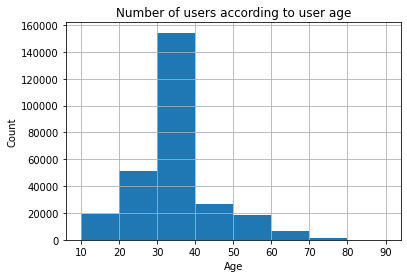

In [37]:
plt.figure(figsize=(6,4))
users.Age.hist(bins=[10*i for i in range(1, 10)])     
plt.title('Number of users according to user age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### Book with highest rating

#### No of books by an author (Top 15)

Text(0.5, 1.0, 'No of books by an author (Top 15)')

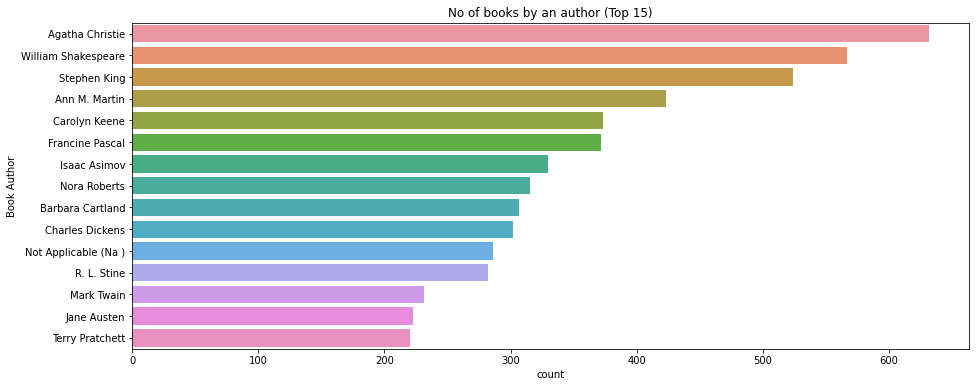

In [38]:
plt.figure(figsize=(15,6))
sns.countplot(y="Book Author", data=Books,order=Books['Book Author'].value_counts().index[0:15])
plt.title("No of books by an author (Top 15)")

#### No of books published by a publisher (Top 15)

Text(0.5, 1.0, 'No of books published by a publisher (Top 15)')

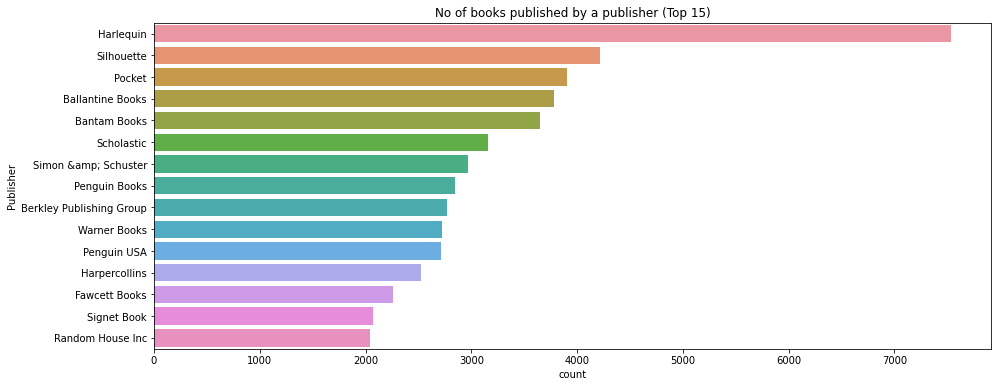

In [39]:
plt.figure(figsize=(15,6))
sns.countplot(y="Publisher", data=Books,order=Books['Publisher'].value_counts().index[0:15])
plt.title("No of books published by a publisher (Top 15)")

#### Top 10 publisher

Text(0.5, 1.0, 'Top 10 Publishers')

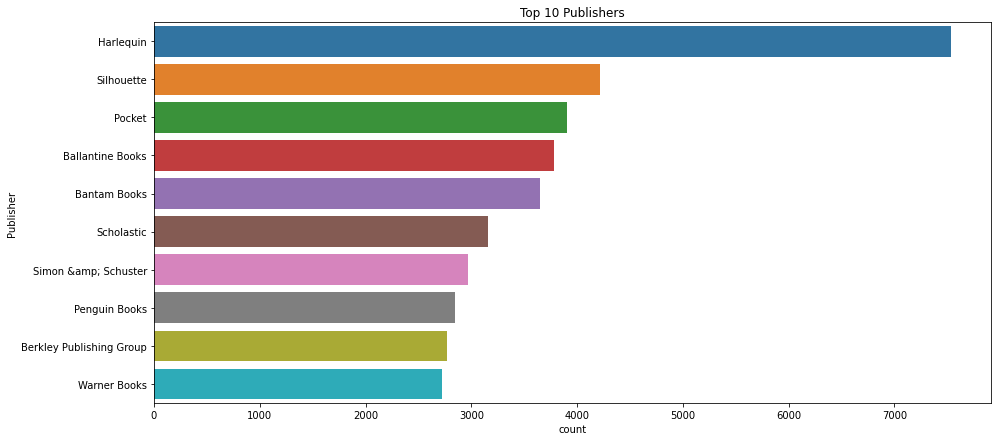

In [40]:
plt.figure(figsize=(15,7))
sns.countplot(y='Publisher',data=Books,order=Books.value_counts(Books['Publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')

#### Top 10 authors who have written the most books

Text(0.5, 1.0, 'Top 10 Authors')

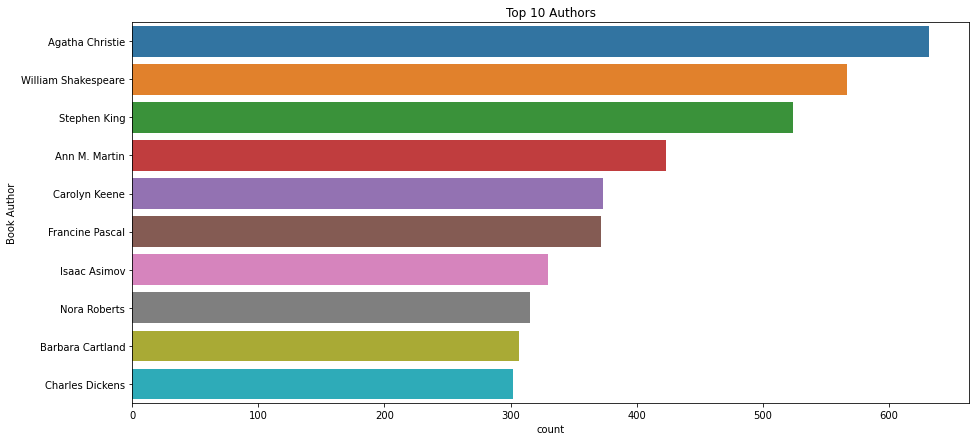

In [41]:
plt.figure(figsize=(15,7))
sns.countplot(y='Book Author',data=Books,order=Books.value_counts(Books['Book Author']).iloc[:10].index)
plt.title('Top 10 Authors')

In [42]:
#Creating a bins based on age groups
users['Age_group'] = pd.cut(users['Age'], bins=[7, 13, 20, 31, 55, 91],
                         labels=['Childhood', 'Teenager', 'Early_adulthood', 'Adult', 'Senior'])

In [43]:
users['Age_group'].value_counts()

Adult              184280
Early_adulthood     56926
Teenager            21668
Senior              14702
Childhood            1282
Name: Age_group, dtype: int64

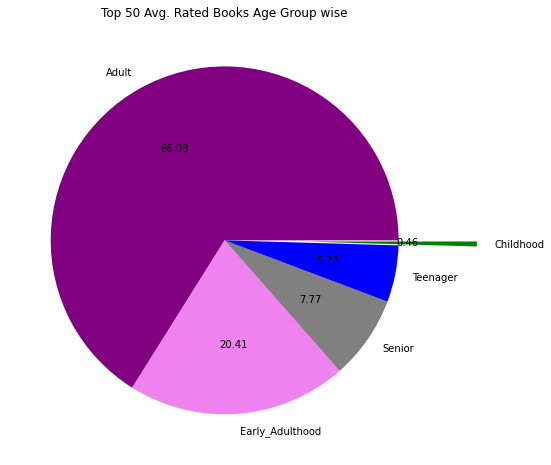

In [44]:
plt.figure(figsize=(15,8))
plt.pie(users['Age_group'].value_counts(), labels=['Adult', 'Early_Adulthood', 'Senior', 'Teenager', 'Childhood'], 
        autopct='%0.2f', colors=['purple', 'violet', 'grey', 'blue', 'green'], explode=[0.0, 0.0, 0.0, 0.0, 0.45])
plt.title('Top 50 Avg. Rated Books Age Group wise')
plt.show()

In [45]:
dataset.columns

Index(['ISBN', 'Book Title', 'Book Author', 'YOP', 'Publisher', 'ImageURL',
       'User-ID', 'Book-Rating', 'Age', 'City', 'State', 'Country'],
      dtype='object')

In [46]:
#Replace ampersands and capitalize book titles
dataset['Book Title'] = dataset['Book Title'].str.replace('&amp;', 'and').apply(lambda x: x.title())

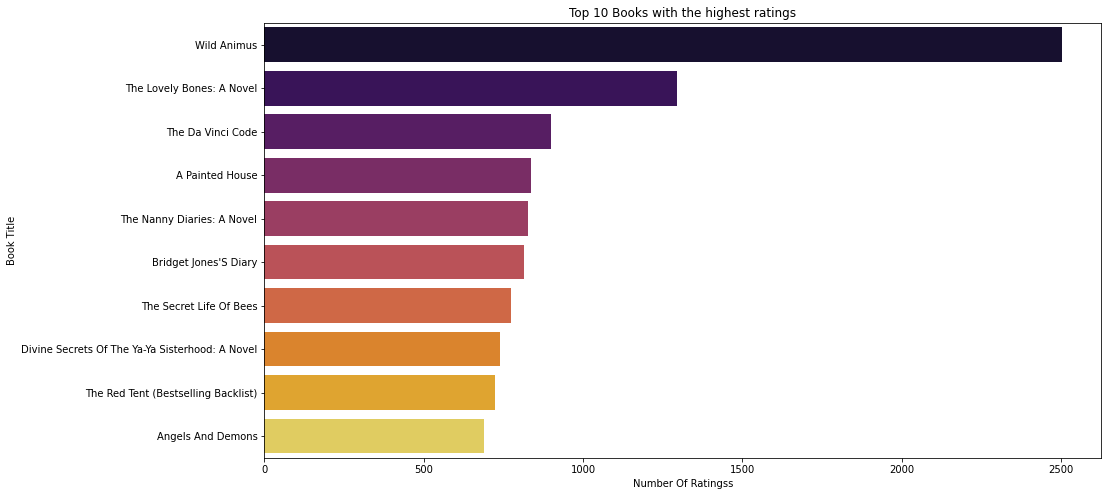

In [47]:
#Top 10 books with the highest ratings

plt.figure(figsize=(15,8))
sns.countplot(y='Book Title', data=dataset, order=dataset['Book Title'].value_counts().index[0:10], palette='inferno')
plt.title('Top 10 Books with the highest ratings')
plt.xlabel("Number Of Ratingss")
plt.show()

#### Most Read Books Country Wise

In [48]:
#Creating List of top-10 country by book readers count
top_10_countries = dataset['Country'].value_counts().nlargest(10).index

#Grouping by Country and Creating dataframe for each 
grouped_dataframes = {}
for country in top_10_countries:
    grouped_dataframes[country] = dataset[dataset['Country'] == country]
    grouped_dataframes[country].reset_index(inplace=True)
    grouped_dataframes[country]['Age'].astype(int)

#Creating list of most read book for each country
book_most={}
for i in top_10_countries:
    book_most[i]=grouped_dataframes[i]['Book Title'].value_counts().nlargest(1).index

In [49]:
for i in top_10_countries:
    print("Most read Book in ",i,' country is ',book_most[i][0],'\n')

Most read Book in  usa  country is  Wild Animus 

Most read Book in  canada  country is  Wild Animus 

Most read Book in  other  country is  The Lovely Bones: A Novel 

Most read Book in  united kingdom  country is  Wild Animus 

Most read Book in  germany  country is  Wild Animus 

Most read Book in  australia  country is  Wild Animus 

Most read Book in  spain  country is  Wild Animus 

Most read Book in  france  country is  Je Voudrais Que Quelqu'Un M'Attende Quelque Part 

Most read Book in  portugal  country is  Wild Animus 

Most read Book in  new zealand  country is  Wild Animus 



In [50]:
#Majority top reading country have same book. Enter country name of top_10_countries list and Verify value_counts of each book
grouped_dataframes['portugal']['Book Title'].value_counts()

Wild Animus                                                                    47
The Da Vinci Code                                                              21
Girl With A Pearl Earring                                                      21
The Red Notebook: True Stories                                                 16
Once Upon A More Enlightened Time: More Politically Correct Bedtime Stories    15
                                                                               ..
Champagne For One                                                               1
Murder Must Advertise                                                           1
They Do It With Mirrors (Miss Marple Mysteries (Paperback))                     1
Wilt On High                                                                    1
O Que Ã© Ecologia E Ambiente                                                    1
Name: Book Title, Length: 4240, dtype: int64

#### Highy Rated Book in each Country

In [51]:
book_ratings={}
for i in top_10_countries:
    #Create Dataframe with average rating received by each book in specific country dataframe
    book_ratings[i] = grouped_dataframes[i].groupby('Book Title')['Book-Rating'].mean().reset_index() 
    book_ratings[i].sort_values('Book-Rating') #Sort new create dataframe by rating

In [52]:
for i in top_10_countries:
    print("Highest rated Book in ",i,' country is ',book_ratings[i]['Book Title'][0],'\n')

Highest rated Book in  usa  country is   A Light In The Storm: The Civil War Diary Of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America) 

Highest rated Book in  canada  country is   Little Comic Shop Of Horrors (Give Yourself Goosebumps, Book 17) 

Highest rated Book in  other  country is   Murder Of A Sleeping Beauty (Scumble River Mysteries (Paperback)) 

Highest rated Book in  united kingdom  country is   Mystery Mile 

Highest rated Book in  germany  country is  !Yo! 

Highest rated Book in  australia  country is  $Weet Deal$ 

Highest rated Book in  spain  country is  --Olivetti, Moulinex, Chaffoteaux Et Maury (Quaderns Crema. Narrativa) 

Highest rated Book in  france  country is  1+1+1 Une Rã?Â©Volution 

Highest rated Book in  portugal  country is  $14 In The Bank (Cathy Collection) 

Highest rated Book in  new zealand  country is  'Night, Mother : A Play (Mermaid Dramabook) 



#### Most read book by Age-Group in each country(Top-10 book reading countries)

In [53]:
'''Grouping Demography by Age
child = 0 to 20
adult = 20 to 50
elderly = 50 to 80'''

for i in top_10_countries:
    grouped_dataframes[i]['Age Group'] = np.select(
        [grouped_dataframes[i]['Age'] < 20, (grouped_dataframes[i]['Age'] >= 20) & (grouped_dataframes[i]['Age'] <= 50), grouped_dataframes[i]['Age'] > 50], 
        ['Child', 'Adult', 'Elderly'], default=None)

In [54]:
grouped_dataframes['usa']

,index,ISBN,Book Title,Book Author,YOP,Publisher,ImageURL,User-ID,Book-Rating,Age,City,State,Country,Age Group
0,0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0,18,stockton,california,usa,Child
1,13674,0060973129,Decision In Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,2954,8,71,wichita,kansas,usa,Elderly
2,13675,0440235502,October Sky: A Memoir,Homer Hickam,1999,Dell,http://images.amazon.com/images/P/0440235502.0...,2954,10,71,wichita,kansas,usa,Elderly
3,13676,0380973499,War'S End: An Eyewitness Account Of America'S ...,Charles W. Sweeney,1997,William Morrow &amp; Company,http://images.amazon.com/images/P/0380973499.0...,2954,7,71,wichita,kansas,usa,Elderly
4,13677,0684867184,"Comrades : Brothers, Fathers, Heroes, Sons, Pals",Stephen E. Ambrose,1999,Simon &amp; Schuster,http://images.amazon.com/images/P/0684867184.0...,2954,0,71,wichita,kansas,usa,Elderly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745834,1031127,0152049266,The Window,Jeanette Ingold,2003,Harcourt Paperbacks,http://images.amazon.com/images/P/0152049266.0...,245444,8,18,linclon,nebraska,usa,Child
745835,1031130,0817310916,One Day In The Life Of A Born Again Loser: And...,Helen Norris,2000,University of Alabama Press,http://images.amazon.com/images/P/0817310916.0...,259416,0,35,parkton,maryland,usa,Adult
745836,1031131,087004124X,Anthem,Ayn Rand,1966,Caxton Press,http://images.amazon.com/images/P/087004124X.0...,259589,8,19,venice,florida,usa,Child
745837,1031132,158243123X,A Student Of Weather,Elizabeth Hay,2001,Counterpoint Press,http://images.amazon.com/images/P/158243123X.0...,259591,8,39,tioga,pennsylvania,usa,Adult


In [55]:
df_grouped_Age={}
for i in top_10_countries:
    df_grouped_Age[i] = grouped_dataframes[i].groupby('Age')

In [56]:
for i in top_10_countries:
    print("Most read book by Age-group in ",i,'is')
    print(df_grouped_Age[i]['Book Title'].agg(pd.Series.mode),'\n\n')

Most read book by Age-group in  usa is
Age
10    [Monster Blood Ii (Goosebumps, No 18), Polar B...
11                    [Inuyasha (Inuyasha), Old Yeller]
12    Harry Potter And The Sorcerer'S Stone (Harry P...
13    [Harry Potter And The Chamber Of Secrets (Book...
14                                          Wild Animus
                            ...                        
76    Lies And The Lying Liars Who Tell Them: A Fair...
77                                          Wild Animus
78    [3 A.D: Mary'S Story, 3Rd Degree, A Light In T...
79                                          The Summons
80    [Body Of Lies, Moving Target, Point Of Impact,...
Name: Book Title, Length: 71, dtype: object 


Most read book by Age-group in  canada is
Age
10    Encyclopedia Brown Saves The Day (Encyclopedia...
11    [A Kid'S Guide To How To Save The Planet (Came...
12    [Gettin' Lucky (Love And Laughter , No 50), Re...
13    [After The Storm (Heartland (Scholastic Paperb...
14    [Artemis Fowl (Art

Age
10         Ballerina 2 - Luci In Spotlight (Ballerinas)
11    [Buried Treasure (Sweet Valley Twins, No 11), ...
12    [Katanga Run, Monster Blood (Goosebumps, No 3)...
13    [A Little Princess, Brog The Stoop (Point - Fa...
14                                          Wild Animus
                            ...                        
73                                             Voyagers
74    [Chocolat, Honourable Schoolboy, Russian Dolls...
75                  [Primal Fear, The Devil'S Teardrop]
77    [Lateral Thinking, The World Of Jane Austen: H...
80                                      The Poppy Field
Name: Book Title, Length: 64, dtype: object 




## Recommendation System

## Model Building 

### 1. Popularity Based Recommendation System

- In this we had derived the average top best rated books (nearly 50) whose number of ratings are more than 250 from the entire data set.
- Hence we found the popular books for the recommendation purposes

In [57]:
ratings_with_name = ratings.merge(Books, on = 'ISBN')

In [58]:
num_rating_df = ratings_with_name.groupby('Book Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [59]:
avg_rating_df = ratings_with_name.groupby('Book Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [60]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book Title')
popular_df

,Book Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [61]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

In [62]:
popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

,Book Title,num_ratings,avg_rating
80433,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80421,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80440,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80425,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80413,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80444,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


In [63]:
popular_df = popular_df.merge(Books,on='Book Title').drop_duplicates('Book Title')[['Book Title','Book Author','ImageURL','num_ratings','avg_rating']]

In [64]:
popular_df['ImageURL'][0]

'http://images.amazon.com/images/P/0439136350.01.LZZZZZZZ.jpg'

In [65]:
popular_df

,Book Title,Book Author,ImageURL,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


## 2.Collaborative Filtering Based Recommender System


- In this approach we had created a pivot table by taking users in the column section & books as the indexes.
- Were in in the grid we had showed that how the ratings for the books are given by that particular users.
- Since the data is very large, we will be considering only those users who had given min ratings on 200 books. (Valuing those - users which are experienced & read lots of books & give regularly ratings)
- Also considering only those books which are more popular and which min 50 users had given the ratings on them.

In [66]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
padhe_likhe_users = x[x].index

In [67]:
x

User-ID
2         False
8         False
9         False
10        False
12        False
          ...  
278846    False
278849    False
278851    False
278852    False
278854    False
Name: Book-Rating, Length: 92106, dtype: bool

In [68]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]
filtered_rating

,User-ID,ISBN,Book-Rating,Book Title,Book Author,YOP,Publisher,ImageURL
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...
1030883,275970,1880837927,0,The Theology of the Hammer,Millard Fuller,1994,Smyth &amp; Helwys Publishing,http://images.amazon.com/images/P/1880837927.0...
1030884,275970,188717897X,0,The Ordeal of Integration: Progress and Resent...,Orlando Patterson,1998,Civitas Book Publisher,http://images.amazon.com/images/P/188717897X.0...
1030885,275970,1888889047,0,Pushcart's Complete Rotten Reviews &amp; Rejec...,Bill Henderson,1998,Pushcart Press,http://images.amazon.com/images/P/1888889047.0...
1030886,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...


In [69]:
y = filtered_rating.groupby('Book Title').count()['Book-Rating']>=50
famous_books = y[y].index
y

Book Title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    False
 Always Have Popsicles                                                                                        False
 Apple Magic (The Collector's series)                                                                         False
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   False
 Clifford Visita El Hospital (Clifford El Gran Perro Colorado)                                                False
                                                                                                              ...  
Ã?Â?ber das Fernsehen.                                                                                        False
Ã?Â?ber die Pflicht zum Ungehorsam gegen den Staat.                                                           False
Ã?Â?lpiraten.                                                

In [70]:
final_ratings = filtered_rating[filtered_rating['Book Title'].isin(famous_books)]
final_ratings

,User-ID,ISBN,Book-Rating,Book Title,Book Author,YOP,Publisher,ImageURL
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...
1026724,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...
1027923,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...


In [71]:
pt = final_ratings.pivot_table(index='Book Title',columns='User-ID',values='Book-Rating')

In [72]:
pt.fillna(0,inplace=True)

In [73]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
from sklearn.metrics.pairwise import cosine_similarity

In [75]:
similarity_scores = cosine_similarity(pt)

In [76]:
similarity_scores.shape # is 1, same plane

(706, 706)

In [77]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = Books[Books['Book Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book Title')['Book Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book Title')['Book Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book Title')['ImageURL'].values))
        
        data.append(item)
    
    return data

In [78]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.LZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.LZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.LZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.LZZZZZZZ.jpg']]

In [79]:
pt.index[1]

'1st to Die: A Novel'

# User Based RS

In [80]:
final_ratings = filtered_rating[filtered_rating['Book Title'].isin(famous_books)]
final_ratings

,User-ID,ISBN,Book-Rating,Book Title,Book Author,YOP,Publisher,ImageURL
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...
1026724,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...
1027923,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...


In [81]:
pt=final_ratings.pivot_table(index='User-ID',columns='Book Title',values='Book-Rating')
pt

Book Title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Day Late and a Dollar Short,A Fine Balance,...,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
254,9.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,7.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274308,NaN,NaN,0.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
275970,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN
277427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
pt.fillna(0,inplace=True)
pt

Book Title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Day Late and a Dollar Short,A Fine Balance,...,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
254,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2766,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
3363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274308,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
275970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
from sklearn.metrics import pairwise_distances

In [84]:
pt1=1-pairwise_distances(pt.values,metric='cosine')

In [85]:
pt1

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.12087741, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.12087741, 1.        , ..., 0.        , 0.        ,
        0.05519574],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.05519574, ..., 0.        , 0.        ,
        1.        ]])

In [86]:
pt2=pd.DataFrame(pt1)
pt2

,0,1,2,3,4,5,6,7,8,9,...,800,801,802,803,804,805,806,807,808,809
0,1.000000,0.000000,0.000000,0.113963,0.0,0.000000,0.000000,0.195832,0.000000,0.073324,...,0.133641,0.000000,0.000000,0.048247,0.000000,0.072985,0.173413,0.000000,0.0,0.000000
1,0.000000,1.000000,0.120877,0.000000,0.0,0.000000,0.343401,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.140975,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.000000,0.120877,1.000000,0.000000,0.0,0.138734,0.000000,0.000000,0.116618,0.056298,...,0.080805,0.000000,0.112360,0.000000,0.038723,0.000000,0.000000,0.000000,0.0,0.055196
3,0.113963,0.000000,0.000000,1.000000,0.0,0.057079,0.000000,0.089181,0.000000,0.000000,...,0.000000,0.106410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,0.000000,0.000000,0.000000,0.000000,1.0,0.139347,0.000000,0.000000,0.000000,0.000000,...,0.117684,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,0.072985,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.066143,0.077970,0.000000,...,0.000000,0.000000,0.048776,0.000000,0.049117,1.000000,0.080119,0.125455,0.0,0.000000
806,0.173413,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.055878,0.000000,0.059623,...,0.058682,0.000000,0.000000,0.000000,0.000000,0.080119,1.000000,0.067174,0.0,0.000000
807,0.000000,0.000000,0.000000,0.000000,0.0,0.048271,0.000000,0.077638,0.000000,0.056806,...,0.000000,0.000000,0.058421,0.000000,0.044654,0.125455,0.067174,1.000000,0.0,0.000000
808,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000


In [87]:
pt2.index=final_ratings['User-ID'].unique()
pt2.columns=final_ratings['User-ID'].unique()

In [88]:
pt2

,278418,3363,7158,11676,23768,27617,28204,29855,30711,32440,...,222204,178950,164828,133868,238961,151806,241198,79441,193560,72352
278418,1.000000,0.000000,0.000000,0.113963,0.0,0.000000,0.000000,0.195832,0.000000,0.073324,...,0.133641,0.000000,0.000000,0.048247,0.000000,0.072985,0.173413,0.000000,0.0,0.000000
3363,0.000000,1.000000,0.120877,0.000000,0.0,0.000000,0.343401,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.140975,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
7158,0.000000,0.120877,1.000000,0.000000,0.0,0.138734,0.000000,0.000000,0.116618,0.056298,...,0.080805,0.000000,0.112360,0.000000,0.038723,0.000000,0.000000,0.000000,0.0,0.055196
11676,0.113963,0.000000,0.000000,1.000000,0.0,0.057079,0.000000,0.089181,0.000000,0.000000,...,0.000000,0.106410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
23768,0.000000,0.000000,0.000000,0.000000,1.0,0.139347,0.000000,0.000000,0.000000,0.000000,...,0.117684,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151806,0.072985,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.066143,0.077970,0.000000,...,0.000000,0.000000,0.048776,0.000000,0.049117,1.000000,0.080119,0.125455,0.0,0.000000
241198,0.173413,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.055878,0.000000,0.059623,...,0.058682,0.000000,0.000000,0.000000,0.000000,0.080119,1.000000,0.067174,0.0,0.000000
79441,0.000000,0.000000,0.000000,0.000000,0.0,0.048271,0.000000,0.077638,0.000000,0.056806,...,0.000000,0.000000,0.058421,0.000000,0.044654,0.125455,0.067174,1.000000,0.0,0.000000
193560,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000


In [89]:
np.fill_diagonal(pt2.values,0)

Top 10 users with highest similarties

In [90]:
pt2.idxmax(axis=1)[0:10]

278418    163804
3363       28204
7158      152186
11676      38023
23768      21659
27617     170518
28204       3363
29855     227447
30711     234828
32440      87143
dtype: int64

### Collaborative Based

In [91]:
Book_pivot = final_ratings.pivot_table(index='Book Title',columns='User-ID',values='Book-Rating')

In [92]:
Book_pivot.fillna(0, inplace=True)

In [93]:
from scipy.sparse import csr_matrix

In [94]:
# CSR - Compressed Sparse Row. For fast row slicing, faster matrix vector products

#Using sparse matrix for pivot table since it has so many NaN values which can be a problem, but with sparse matrix it can only compute the non-null values


Book_sparse = csr_matrix(Book_pivot)

In [95]:
type(Book_sparse)

scipy.sparse._csr.csr_matrix

#### KNN Nearest Neighbors 

In [96]:
from sklearn.neighbors import NearestNeighbors

Model = NearestNeighbors(algorithm='brute')

In [97]:
Model.fit(Book_sparse)

NearestNeighbors(algorithm='brute')

In [98]:
distance, suggestion = Model.kneighbors(Book_pivot.iloc[237, :].values.reshape(1,-1), n_neighbors=6)

In [99]:
distance

array([[ 0.        , 29.30870178, 30.01666204, 30.41381265, 30.47950131,
        30.87069808]])

In [100]:
suggestion

array([[237, 357, 652, 175, 308, 142]], dtype=int64)

In [101]:
Book_pivot.iloc[244,:]

User-ID
254       0.0
2276      0.0
2766      0.0
2977      0.0
3363      0.0
         ... 
274308    0.0
275970    0.0
277427    0.0
277639    0.0
278418    0.0
Name: High Fidelity, Length: 810, dtype: float64

In [102]:
for i in range(len(suggestion)):
    print(Book_pivot.index[suggestion[i]])

Index(['Hearts In Atlantis', 'No Safe Place',
       'Tom Clancy's Op-Center (Tom Clancy's Op Center (Paperback))',
       'Exclusive', 'Long After Midnight',
       'Deck the Halls (Holiday Classics)'],
      dtype='object', name='Book Title')


In [103]:
Book_pivot.index[4]

'A Bend in the Road'

In [104]:
#keeping books name
Book_names = Book_pivot.index

In [105]:
Book_names[242]

'Hide &amp; Seek'

In [106]:
np.where(Book_pivot.index == '4 Blondes')[0][0]

3

In [107]:
final_ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book Title', 'Book Author', 'YOP',
       'Publisher', 'ImageURL'],
      dtype='object')

##### Finding URLs

In [108]:
ids = np.where(final_ratings['Book Title'] == "Harry Potter and the Chamber of Secrets (Book 2)")[0][0]

In [109]:
final_ratings.iloc[ids]['ImageURL']

'http://images.amazon.com/images/P/0439064864.01.LZZZZZZZ.jpg'

In [110]:
book_name = []
for book_id in suggestion:
    book_name.append(Book_pivot.index[book_id])

In [111]:
book_name[0]

Index(['Hearts In Atlantis', 'No Safe Place',
       'Tom Clancy's Op-Center (Tom Clancy's Op Center (Paperback))',
       'Exclusive', 'Long After Midnight',
       'Deck the Halls (Holiday Classics)'],
      dtype='object', name='Book Title')

In [112]:
ids_index = []
for name in book_name[0]: 
    ids = np.where(final_ratings['Book Title'] == name)[0][0]
    ids_index.append(ids)

In [113]:
for idx in ids_index:
    url = final_ratings.iloc[idx]['ImageURL']
    print(url)

http://images.amazon.com/images/P/0671024248.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0345404777.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0425147363.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0446604232.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0553571818.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0743418131.01.LZZZZZZZ.jpg


#### Model Evaluation

In [114]:
def recommend_book(Book_name):
    Book_id = np.where(Book_pivot.index == Book_name)[0][0]
    distance, suggestion = Model.kneighbors(Book_pivot.iloc[Book_id,:].values.reshape(1,-1), n_neighbors=6 )
    
    for i in range(len(suggestion)):
            books = Book_pivot.index[suggestion[i]]
            for j in books:
                if j == Book_name:
                    print(f"You searched '{Book_name}'\n")
                    print("The suggestion books are: \n")
                else:
                    print(j)

In [115]:
Book_name = "Harry Potter and the Chamber of Secrets (Book 2)"
recommend_book(Book_name)

You searched 'Harry Potter and the Chamber of Secrets (Book 2)'

The suggestion books are: 

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Exclusive
Tom Clancy's Op-Center (Tom Clancy's Op Center (Paperback))


In [116]:
import pickle
pickle.dump(Model,open('Model.pkl','wb'))
pickle.dump(Book_names,open('Book_names.pkl','wb'))
pickle.dump(final_ratings,open('final_ratings.pkl','wb'))
pickle.dump(Book_pivot,open('Book_pivot.pkl','wb'))

In [125]:
pickle.dump(popular,open('Popular_df', 'wb'))

In [118]:
popular_df.shape

(50, 5)

In [119]:
popular_df.columns

Index(['Book Title', 'Book Author', 'ImageURL', 'num_ratings', 'avg_rating'], dtype='object')

In [120]:
len(popular_df)

50

In [124]:
popular = popular_df['ImageURL'].tolist()

In [127]:
final_ratings['Book Author'].value_counts()

Stephen King             2381
Nora Roberts             2241
John Grisham             1763
James Patterson          1711
Mary Higgins Clark       1298
                         ... 
Golden Books                1
Cornwell Patricia           1
H. C. Anderson              1
Troy M. Litten              1
Jerome David Salinger       1
Name: Book Author, Length: 573, dtype: int64

In [128]:
final_ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book Title', 'Book Author', 'YOP',
       'Publisher', 'ImageURL'],
      dtype='object')

In [133]:
#final_authors = final_ratings[final_ratings['Book Author'].value_counts() > 1200]
final_authors = final_ratings.groupby('Book Author').count().reset_index()

In [135]:
final_ratings.groupby('Book Author').count()['Book Title'].reset_index()

,Book Author,Book Title
0,A. Manette Ansay,103
1,A.S. BYATT,56
2,ANNA QUINDLEN,157
3,ANNE FRANK,62
4,ANNE RICE,219
...,...,...
568,Winston Groom,68
569,Yann Martel,175
570,Yann Queffelec,2
571,Zachary Alan Fox,10


In [145]:
a = final_ratings['Publisher'].value_counts().index[0:10]

In [146]:
a[0]

'Ballantine Books'

In [147]:
df = final_ratings.loc[final_ratings['Book Title'] == a[0]]

In [148]:
df

,User-ID,ISBN,Book-Rating,Book Title,Book Author,YOP,Publisher,ImageURL


In [149]:
a

Index(['Ballantine Books', 'Berkley Publishing Group', 'Warner Books',
       'Pocket', 'Dell', 'Bantam', 'Dell Publishing Company', 'Bantam Books',
       'Jove Books', 'Signet Book'],
      dtype='object')